## Image Denosing with Sauvola's Algorithm


In [30]:
import cv2
import os
import numpy as np
import bottleneck as bn

import matplotlib.pyplot as plt

In [15]:
# Get Noise Images File
def get_image_files(noise_images_dir: str)-> list[str]:
    image_files = []
    image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.webp')
    for root, _, files in os.walk(noise_images_dir):
        temp_image_files = [
            root+r'/'+file_name 
            for file_name in files 
            if file_name.lower().endswith(
                image_extensions
            )
        ]
        image_files = [*image_files,*temp_image_files]
    return image_files

def check_dir_exist(dir_name: str, create_dir: bool = False)-> None:
    path_exists = os.path.exists(dir_name)
    if not path_exists:
        print(f"{dir_name} does not exist.")
        if create_dir:
            print(f"Creating {dir_name} directory.")
            # os.mkdir(dir_name)
            # dir create

In [29]:
def read_image(image: str)-> np.ndarray:
    img = cv2.imread(image, cv2.COLOR_BGR2GRAY)
    return img

# TO Do -> need to define window_size by image
def binarize_with_sauvola(img: np.ndarray, window_size: int=25, k_factor=0.1)-> np.ndarray:
    binary_mask = np.zeros(img.shape)

    w = window_size
    k = k_factor

    # Moving window average and standard deviation
    m = bn.move_mean(img, window=int(w), min_count=1)
    s = bn.move_std(img, window=int(w), min_count=1)
    T = get_sauvola_threshold(m,s,k)
    binary_mask = np.where(img<T, 1.0, 0.0)
    
    return binary_mask

def get_sauvola_threshold(m, s, k):
    R = np.amax(s)
    return m*(1 + k*(s/(R-1)))

In [34]:
def get_binary_images(
        images_dir: str, 
        save_dir: str, 
        window_size: int=25,
        k_factor: int=1
    ) -> None:
    check_dir_exist(dir_name=images_dir)
    check_dir_exist(dir_name=save_dir, create_dir=True)
    image_files = get_image_files(images_dir)
    for image_name in image_files:
        image = read_image(image_name)
        image = image/255
        binary_image = binarize_with_sauvola(image)

        plt.imshow(binary_image, cmap=plt.cm.gray)
        plt.show()

 does not exist.
Creating  directory.


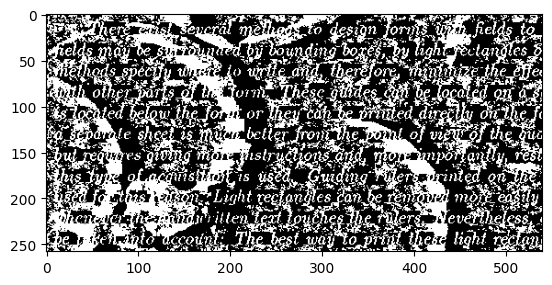

In [37]:
get_binary_images("noise_images", "", window_size=10, k_factor=0.01)